In [1]:
def eratosthenes(upper, verbosity = False):
    """Return the list of primes up the given upper bound using the sieve of Eratosthenes algorithm"""
    primes = list(range(2,upper+1))
    divisor = 1
    while True:
        divisor += 1
        if divisor > upper:
            break
        i=0
        while i < len(primes):
            if primes[i] > divisor and primes[i] % divisor == 0:
                primes.remove(primes[i])
            else:
                i += 1
        if verbosity == True: print("divisor %d:"%divisor,primes)
    if verbosity == True: print("Primes up to %d are:"%upper,primes)
    return primes

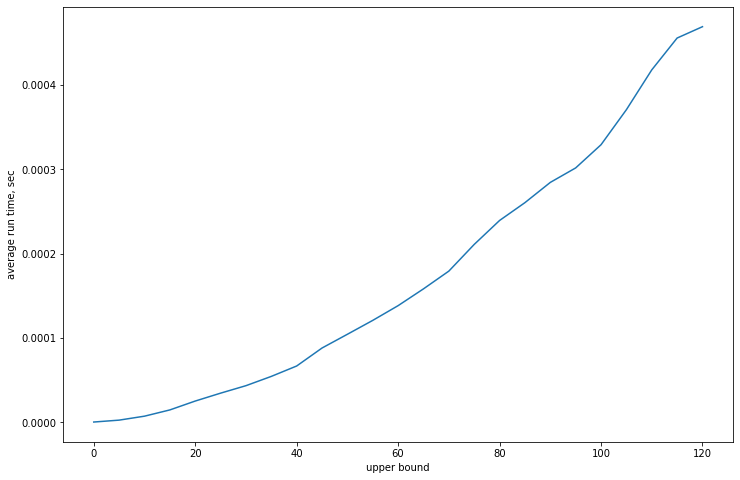

In [2]:
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

N = 25
n,x = [0,] * N, [0,] * N
for i,k in [(i,5*i) for i in range(N)]:
    n[i] = k
    x[i] = timeit.timeit(stmt='eratosthenes(k)', number=1000, globals=globals())/1000

plt.plot(n,x)
plt.xlabel('upper bound')
plt.ylabel('average run time, sec')
plt.show()

In [3]:
def eratosthenes_better(upper, verbosity = False):
    primes = list(range(2,upper+1))
    idiv = 0
    while True:
        divisor = primes[idiv]
        if divisor**2 > upper:
            break
        i=idiv+1
        while i < len(primes):
            if primes[i] < divisor**2:
                i += 1
            elif primes[i] % divisor == 0:
                primes.remove(primes[i])
            else:
                i += 1
        idiv += 1
        if verbosity: print("divisor %d:"%divisor,primes)
    if verbosity: print("Primes up to %d are:"%upper,primes)
    return primes

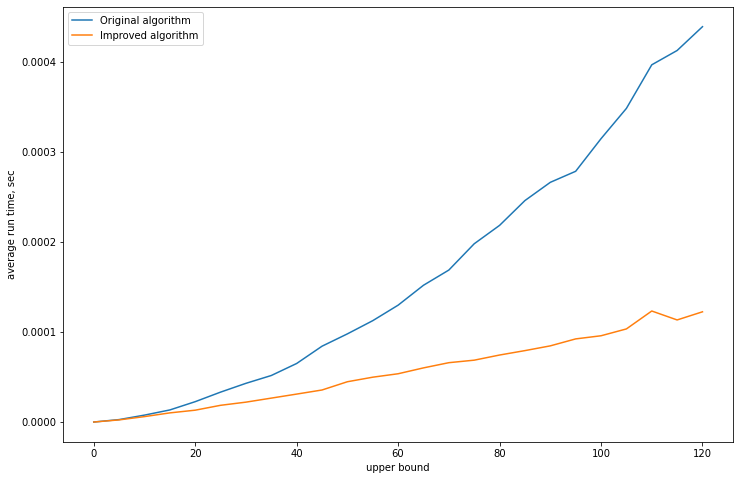

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

N = 25
n,x,y = [0,] * N, [0,] * N, [0,] * N
for i,k in [(i,5*i) for i in range(1,N)]:
    n[i] = k
    x[i] = timeit.timeit(stmt='eratosthenes(k)', number=1000, globals=globals())/1000
    y[i] = timeit.timeit(stmt='eratosthenes_better(k)', number=1000, globals=globals())/1000

plt.plot(n,x,label='Original algorithm')
plt.plot(n,y,label='Improved algorithm')
plt.xlabel('upper bound')
plt.ylabel('average run time, sec')
plt.legend()
plt.show()